In [12]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests
import openpyxl

In [ ]:
#read in the excel file on TTC delay data

ttc_data = pd.read_excel('ttc-subway-delay-data-2024.xlsx')
ttc_data

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
...,...,...,...,...,...,...,...,...,...,...
26462,2024-12-31,01:55,Tuesday,KENNEDY BD STATION,MUTO,0,0,E,BD,5338
26463,2024-12-31,11:05,Tuesday,SHEPPARD-YONGE STATION,PUOPO,0,0,E,SHP,6151
26464,2024-12-31,13:14,Tuesday,DON MILLS STATION,MUSC,0,0,W,SHP,6156
26465,2024-12-31,16:20,Tuesday,SHEPPARD-YONGE STATION,EUSC,0,0,E,SHP,6151


In [ ]:
#drop rows in dataframe where there was no delay

ttc_data = ttc_data[ttc_data['Min Delay']!=0]


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
5,2024-01-01,02:25,Monday,ST CLAIR STATION,MUPAA,3,9,N,YU,6051
7,2024-01-01,02:27,Monday,WOODBINE STATION,EUDO,7,13,E,BD,5077
...,...,...,...,...,...,...,...,...,...,...
26446,2024-12-31,23:18,Tuesday,MUSEUM STATION,MUPAA,3,8,S,YU,6081
26451,2024-12-31,00:08,Tuesday,UNION STATION,MUPR1,6,10,N,YU,5546
26459,2024-12-31,01:27,Tuesday,ST CLAIR WEST STATION,MUIR,13,18,N,YU,5416
26461,2024-12-31,01:37,Tuesday,DUNDAS WEST STATION,MUPAA,3,7,W,BD,5069


In [55]:
#count the number of each unique type of delay ('Code')

values, counts = np.unique(ttc_data['Code'],return_counts = True)
ttc_code = pd.DataFrame(list(zip(values, counts)),columns=["value","count"])
ttc_code


,value,count
0,EUAC,25
1,EUAL,4
2,EUATC,11
3,EUBK,52
4,EUBO,28
...,...,...
110,TUOS,32
111,TUS,55
112,TUSC,56
113,TUSET,10


In [144]:
# create new column with percentage for each type of delay
ttc_code['perc'] = ttc_code['count']/(ttc_code['count'].sum())*100
ttc_code = ttc_code.sort_values(by='perc',ascending=False).reset_index()
print(ttc_code[ttc_code['perc']> 3]) #print out all delay types that occur more than 3% of the time

   index  value  count       perc
0     91   SUDP   1261  13.423462
1     42  MUPAA    899   9.569938
2     62  PUOPO    855   9.101554
3     94    SUO    596   6.344475
4     37   MUIR    584   6.216734
5     48  MUSAN    410   4.364488
6     99   SUUT    404   4.300617
7     35    MUI    377   4.013200


Text(0.5, 1.0, 'Top Reasons for TTC Delays in 2024')

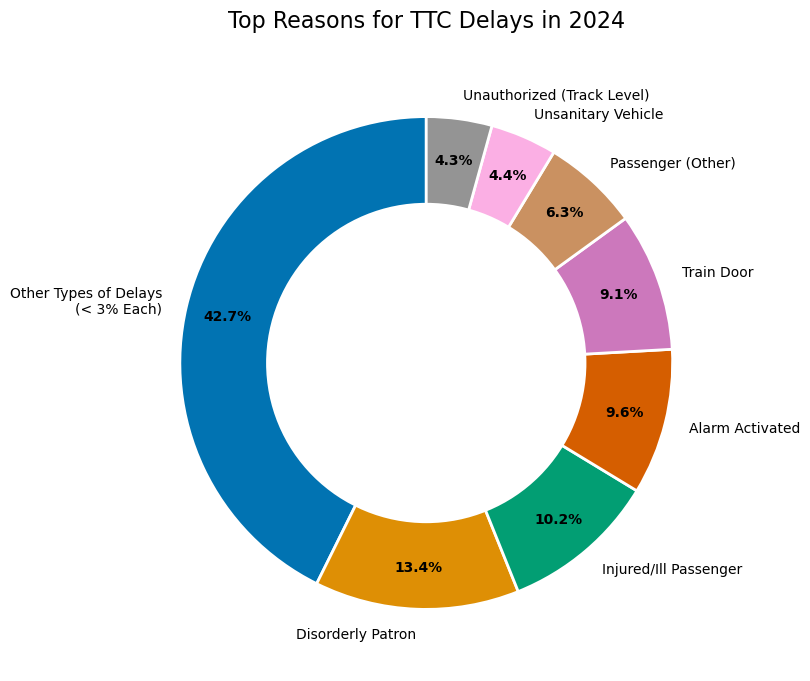

In [164]:
pie_data = ttc_code.copy()
import seaborn as sns

plt.figure(figsize = (8,8))

# rename codes with definition
pie_data = pie_data.replace({'value' : { 'SUDP' : 'Disorderly Patron', 'MUPAA' : 'Alarm Activated', 'PUOPO' : 'Train Door',
                             'SUO': 'Passenger (Other)', 'MUIR': 'Injured/Ill Passenger', 'MUSAN': 'Unsanitary Vehicle', 
                             'SUUT': 'Unauthorized (Track Level)', 'MUI':'Injured/Ill Passenger'}})
pie_data.loc[pie_data['perc'] < 3, 'value'] = 'Other Types of Delays' + '\n' +'(< 3% Each)'

# plot a pie chart
pie_data = pie_data.groupby('value')['perc'].sum().sort_values(ascending=False).reset_index()

patches, texts, pcts = plt.pie(pie_data['perc'], labels=pie_data['value'], autopct='%1.1f%%', startangle = 90, textprops= {'fontsize': 10},
        colors=sns.color_palette('colorblind'), pctdistance = 0.83, wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})

plt.setp(pcts, fontweight='bold')

# add a hole
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
 
# Add Title
plt.title(
    label="Top Reasons for TTC Delays in 2024", 
    fontdict={"fontsize":16},
    pad = 20
)
 
